In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car data.csv', index_col = False)

In [3]:
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


kms_driven , Fuel_Type, Transmission, Owner : Categorical Feature

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# not taking car name as it might not effect the significant effect on price
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset['Current Year']=2021

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [12]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
final_dataset=final_dataset.drop(['Year', 'Current Year'],axis=1)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
#Multiple Linear Regression
# dealing with categorical values
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
# dropping first col to prevent from dummy variable trap


In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [18]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

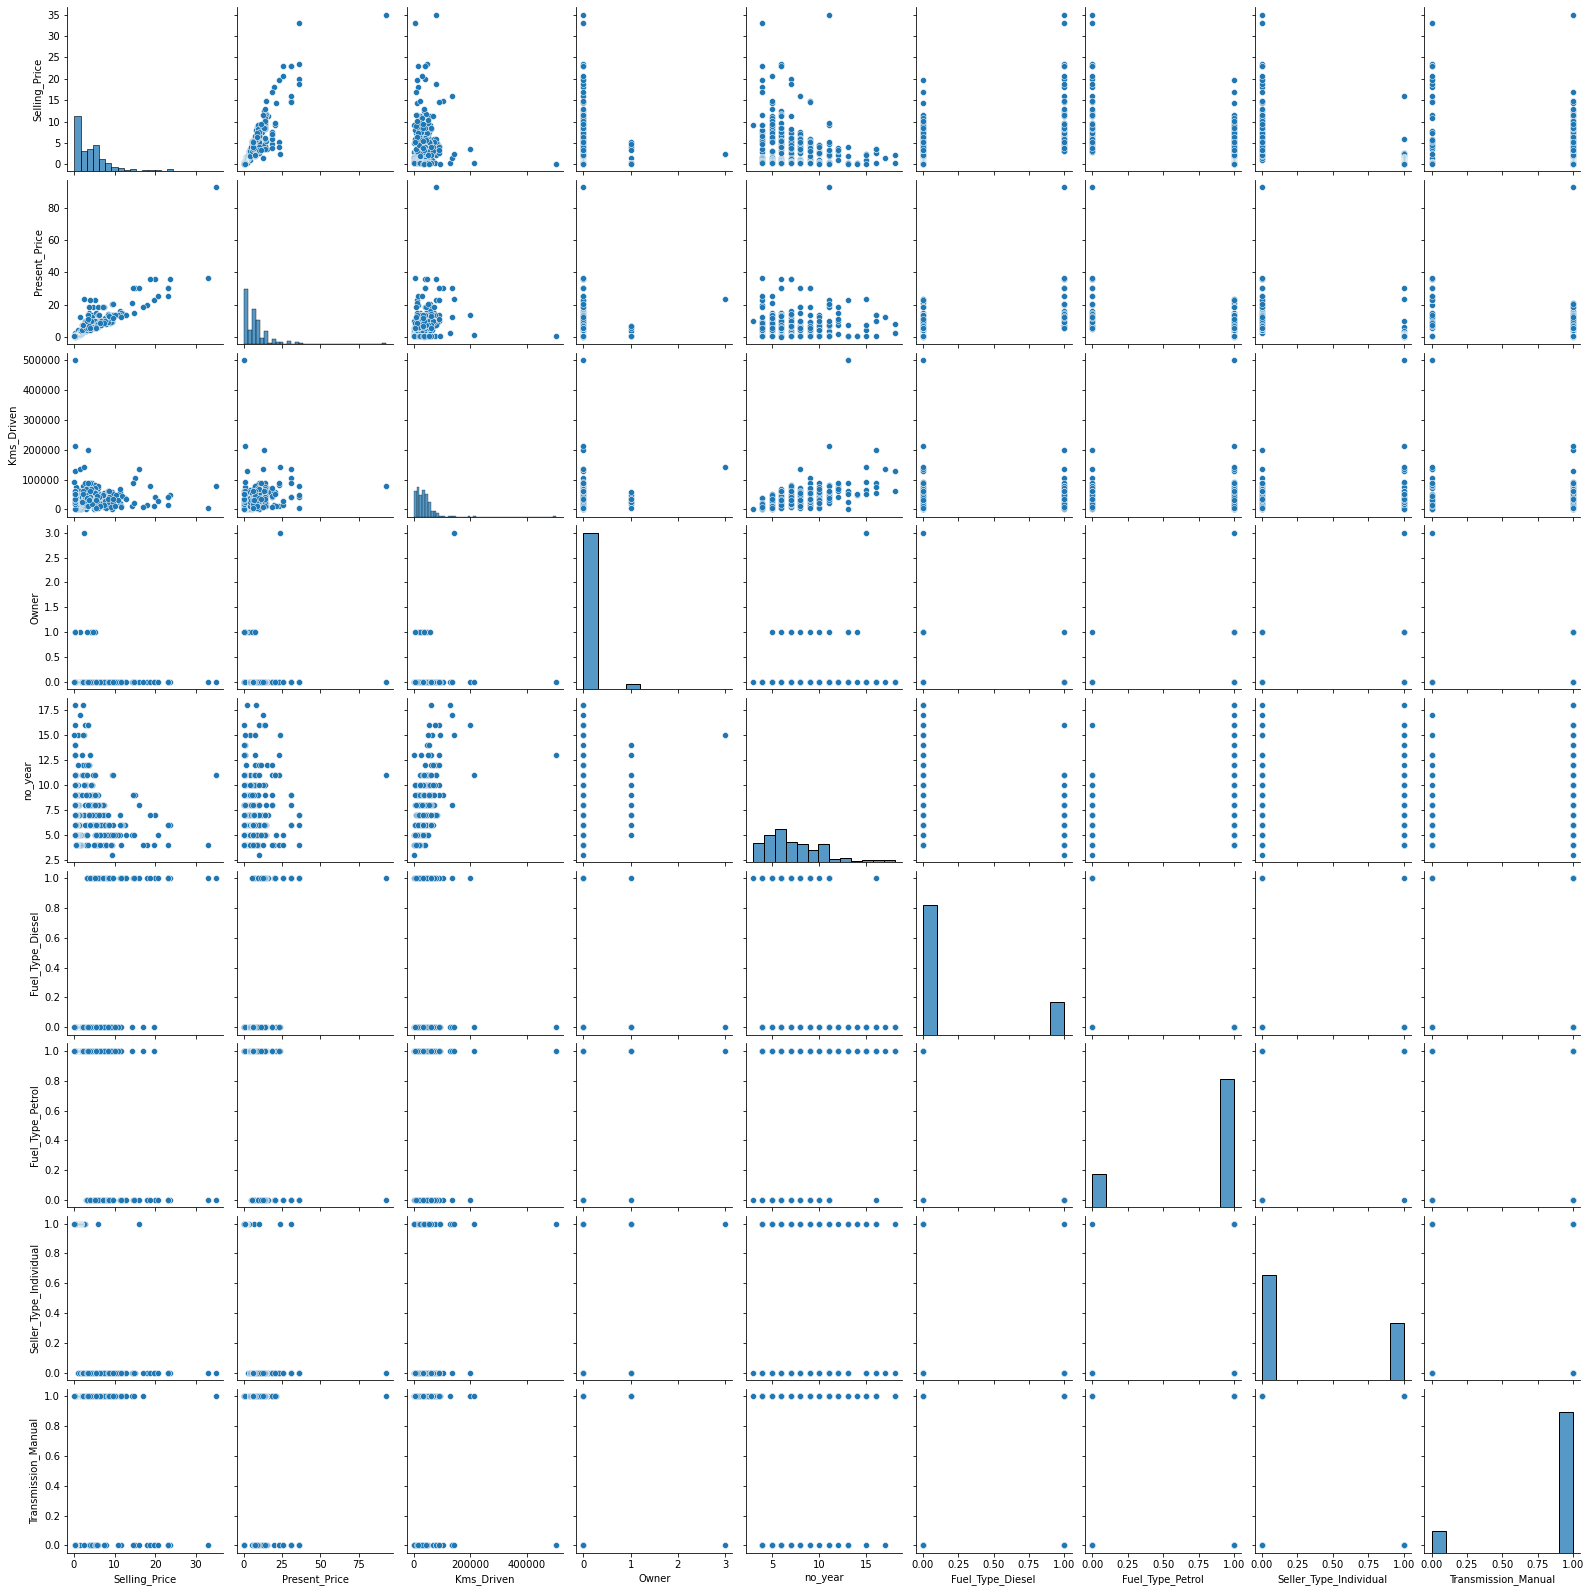

In [21]:
sns.pairplot(final_dataset)

<AxesSubplot:>

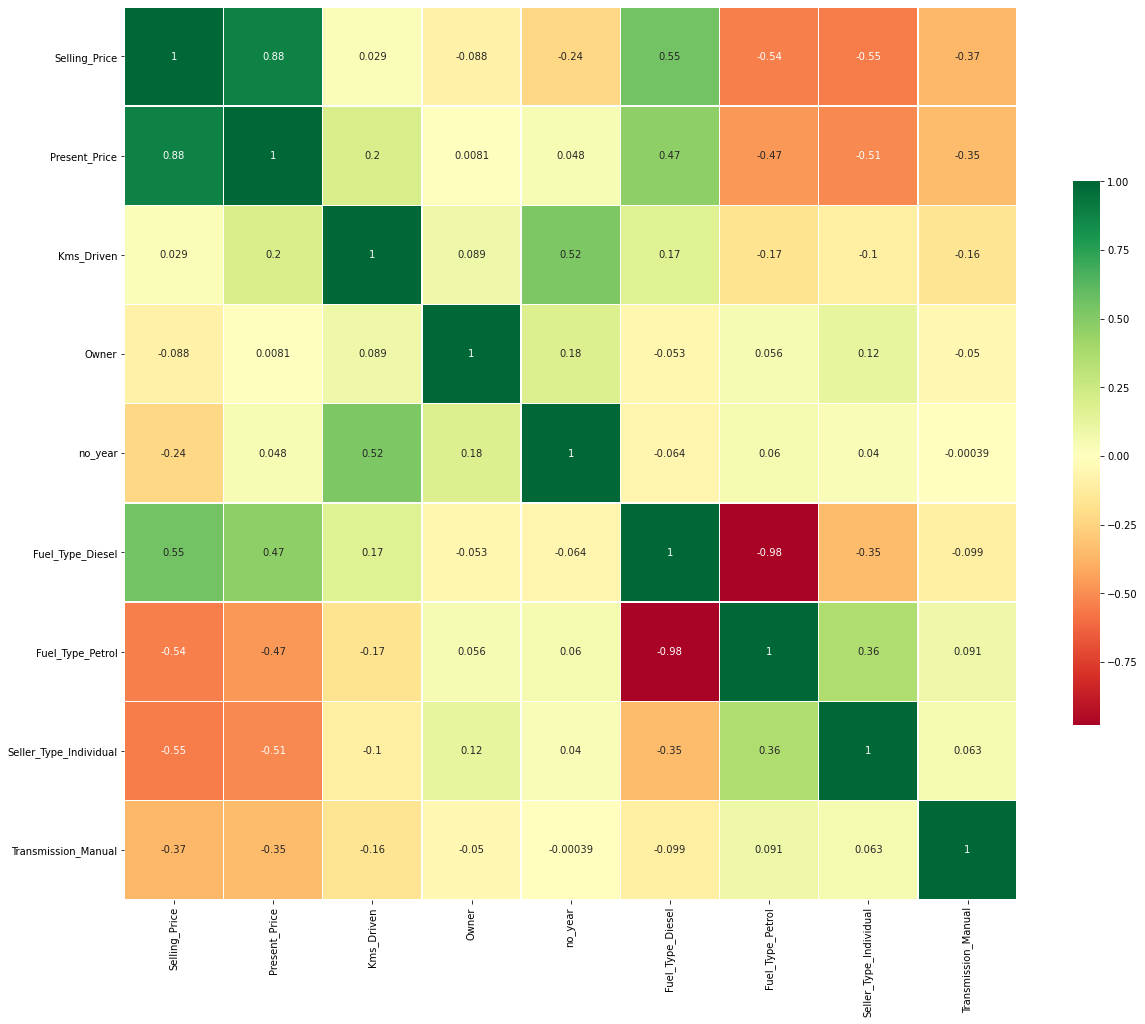

In [22]:
# corrmat = final_dataset.corr()
# top_corr_features = corrmat.index 
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset.corr(), annot = True, center=0, cmap= "RdYlGn",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [24]:
## independent and dependent features

In [25]:
X=final_dataset.iloc[:,1:]
#X = final_datset.drop('Selling_Price', axis =1)
y=final_dataset.iloc[:,0]
# y = final_dataset['Selling_Price']

In [26]:
print(len(X.columns))

8


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [29]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[0.41778598 0.04160201 0.00066495 0.07695131 0.20206902 0.01295472
 0.1263574  0.1216146 ]


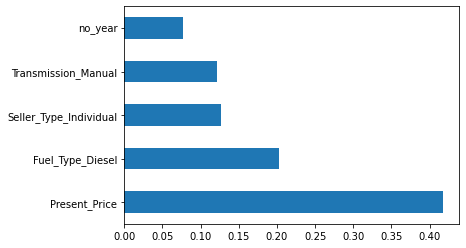

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Multiple Linear Regreesion

In [32]:


import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

#P<0.05
# R sqaured 87% which is good model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          5.71e-131
Time:                        00:28:26   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.1882      1.330      3.901      0.000       2.571       7.805
Present_Price              0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven             -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                     -0.6742      0.423     -1.595      0.112      -1.506       0.158
no_year                   -0.3931      0.043     -9.159      0.000      -0.478      -0.309
Fuel_Type_Diesel           2.4699      1.278      1.932      0.054      -0.046       4.986
Fuel_Type_Petrol           0.6077      1.259      0.483      0.630      -1.870       3.085
Seller_Type_Individual    -1.1213      0.257     -4.371      0.000      -1.626      -0.616
Transmission_Manual       -1.4482      0.328     -4.417      0.000      -2.093      -0.803
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
print(len(X_train.columns))

9


In [35]:
print(len(X_test.columns))

9


In [36]:
X_test.head()
# const term added. Need to remove it from both X_train and X_test

,const,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,1.0,9.400,61381,0,6,1,0,0,1
150,1.0,0.826,6000,0,10,0,1,1,1
226,1.0,5.700,24678,0,6,0,1,0,1
296,1.0,11.600,33988,0,5,1,0,0,1
52,1.0,19.770,15000,0,4,1,0,0,0


In [41]:
X_train = X_train.iloc[: , 1:]

In [42]:
X_train.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,7,1,0,0,1
283,11.80,9010,0,5,0,1,0,1
44,2.69,50000,0,9,0,1,0,1
245,9.40,71000,0,9,1,0,0,1
191,0.57,25000,1,9,0,1,1,1


In [43]:
X_test = X_test.iloc[: , 1:]

In [44]:
X_test.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,6,1,0,0,1
150,0.826,6000,0,10,0,1,1,1
226,5.700,24678,0,6,0,1,0,1
296,11.600,33988,0,5,1,0,0,1
52,19.770,15000,0,4,1,0,0,0


In [45]:
"""
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
"""

'\nmissing_cols = set( X_train.columns ) - set( X_test.columns )\n# Add a missing column in test set with default value equal to 0\nfor c in missing_cols:\n    X_test[c] = 0\n# Ensure the order of column in the test set is in the same order than in train set\nX_test = X_test[X_train.columns]\n'

# Random forest regressor --  decision tree

In [46]:
# Parameter taken is random
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [47]:
rf_random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True,
                      random_state=400)

In [48]:
rf_random.oob_score_

0.902904240040159

### It seems random forest (without hyper parameter tuning) gave 90% where as Linear Regression gave 87% accuracy.

In [49]:
## Hyper parameter Tuning
for w in range(100,1200,100):
    rf_random=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf_random.fit(X_train,y_train)
    oob=rf_random.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.902520799634714
************************
For n_estimators = 200
OOB score is 0.8984377622024009
************************
For n_estimators = 300
OOB score is 0.8995834565221329
************************
For n_estimators = 400
OOB score is 0.8998009596703495
************************
For n_estimators = 500
OOB score is 0.900843421366723
************************
For n_estimators = 600
OOB score is 0.9013035821272937
************************
For n_estimators = 700
OOB score is 0.9012734202203884
************************
For n_estimators = 800
OOB score is 0.9013919901458913
************************
For n_estimators = 900
OOB score is 0.9010142072325568
************************
For n_estimators = 1000
OOB score is 0.900977049012955
************************
For n_estimators = 1100
OOB score is 0.9010279905137836
************************


In [50]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [51]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] # list comprehension
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [54]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

# Boosted Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

clf=GradientBoostingRegressor(n_estimators=80,random_state=400)
clf.fit(X_train,y_train)


GradientBoostingRegressor(n_estimators=80, random_state=400)

In [59]:
clf.score(X_test,y_test)

0.9180319900760976

## Boosted classifier gave around 91% accuracy

In [60]:
# Hyper parameter for boosted
from sklearn.model_selection import GridSearchCV

In [61]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[40,60,80,100,120,140,160]})
mod.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=80,
                                                 random_state=400),
             param_grid={'n_estimators': [40, 60, 80, 100, 120, 140, 160]})

In [62]:
mod.best_estimator_

GradientBoostingRegressor(n_estimators=80, random_state=400)

# Prediction _ Using RandomForest

In [63]:
predictions=rf_random.predict(X_test)

In [64]:
predictions

array([ 7.1055 ,  0.54186,  5.08844,  9.24261, 16.32398,  5.01149,
        3.4079 ,  0.74763,  4.70129,  4.512  ,  3.13349,  0.85671,
        4.94654,  7.77776,  7.96111, 10.42382,  7.20589,  4.11857,
        0.49395,  1.46735,  4.00789,  4.70591,  5.54022,  9.40625,
        0.25851,  0.76103,  0.59683,  0.65735,  0.47693,  4.8378 ,
        4.96213,  5.81655,  0.51255,  8.87736,  3.4573 ,  1.1581 ,
        5.62697,  7.42752,  0.27551,  8.97182,  9.55526, 19.46993,
        4.92955,  4.14745,  5.3967 , 11.75713,  0.31919,  0.88957,
        4.95595,  8.32732,  7.4485 ,  3.55406,  4.68885, 20.58254,
        1.0995 ,  1.07591,  0.50847,  2.75352,  3.6901 ,  1.25284,
        3.9416 ,  8.85821,  3.23066, 20.98344,  4.19265,  5.60403,
       10.24367,  4.80058,  0.5729 ,  3.03547,  3.39508,  3.05874,
        0.63185,  5.43595,  0.93064,  2.89234,  0.51873,  9.15002,
        1.3026 ,  2.7445 ,  0.49038,  9.94896,  7.43818,  5.52555,
        5.14777,  0.94307,  6.31767,  5.9811 ,  0.4471 ,  4.97

C:\Users\ayushjain9\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

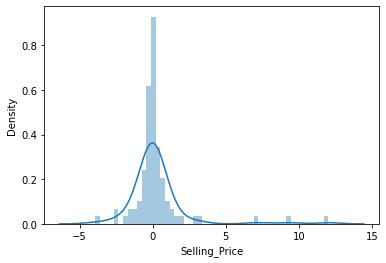

In [65]:
sns.distplot(y_test-predictions)
# difference between ytest and prediction should be minimal

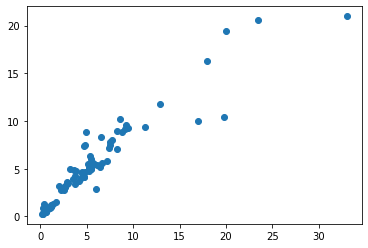

In [66]:
plt.scatter(y_test,predictions)
# ytest and prediction values are approx inline

In [67]:
from sklearn import metrics

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8953679120879121
MSE: 4.007711449151654
RMSE: 2.001926934019235


In [69]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)